In [11]:
from torchvision import datasets
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from letter_recognition import RNG

%matplotlib inline

In [12]:
# Dataset import
train = datasets.EMNIST("./data/raw/", train=True, split="letters", download=True)
test = datasets.EMNIST("./data/raw/", train=False, split="letters", download=True)
data = train + test

  0%|          | 0/561753746 [00:00<?, ?it/s]

Extracting ./letter_recognition/data/EMNIST/raw/emnist.zip to ./letter_recognition/data/EMNIST/raw
Processing byclass
Processing bymerge
Processing balanced
Processing letters
Processing digits
Processing mnist
Done!


In [13]:
# X/Y split
images = np.empty((len(data), 1, 28, 28))
labels = np.empty(len(data))
for i in tqdm(range(len(data))):
    images[i, 0] = data[i][0]
    labels[i] = data[i][1] - 1 # -1 because we index from 0 (A: 0, B: 1, etc...)

  0%|          | 0/145600 [00:00<?, ?it/s]

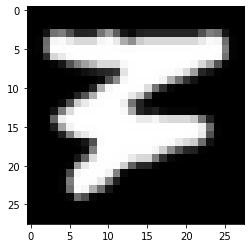

In [14]:
# Raw image example
fig, ax = plt.subplots()
ax.imshow(images[0, 0], cmap="gray")
plt.show()

In [15]:
# Rotate, flip and normalize/binarize
images_rotated = scipy.ndimage.rotate(images, -90, axes=(2, 3))
images_flipped = np.flip(images_rotated, 3)

threshold = ((np.max(images_flipped) + np.mean(images_flipped)) / 2) * (1 - 0.2 * (1 - np.std(images_flipped) / 128))
print(threshold)
images_binarized = np.where(images_flipped > threshold, 1.0, 0.0)

139.273713005622


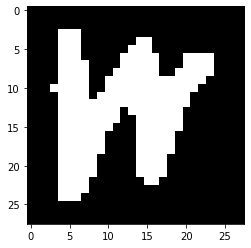

In [16]:
# Processed image example
fig, ax = plt.subplots()
ax.imshow(images_binarized[0, 0], cmap="gray")
plt.show()

In [17]:
# Shuffle just in case
p = RNG.permutation(len(images_normalized))
images_binarized = images_binarized[p]
labels = labels[p]

In [18]:
# Numpy saving for future uses
# with open("letter_recognition/data/dataset/data.npz", "wb") as f:
#     np.savez_compressed(f, X=images_binarized, Y=labels)
with open("./data/processed/data.npz", "wb") as f:
    np.savez_compressed(f, X=images_binarized, Y=labels)